<a href="https://colab.research.google.com/github/Lokeshyenetala/template-assign-03-hosting/blob/main/Customer-Segmentation-Using-K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
data = pd.read_csv('/content/train.csv')

In [5]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [7]:
data.shape

(8068, 11)

In [8]:
data.isnull().sum()

,0
ID,0
Gender,0
Ever_Married,140
Age,0
Graduated,78
Profession,124
Work_Experience,829
Spending_Score,0
Family_Size,335
Var_1,76


In [9]:
print("Descriptive statistics for numerical columns:")
print(data.describe())

print("Unique values for categorical columns:")
categorical_columns = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation']
for col in categorical_columns:
    print(f"{col}: {data[col].unique()}")

Descriptive statistics for numerical columns:
                  ID          Age  Work_Experience  Family_Size
count    8068.000000  8068.000000      7239.000000  7733.000000
mean   463479.214551    43.466906         2.641663     2.850123
std      2595.381232    16.711696         3.406763     1.531413
min    458982.000000    18.000000         0.000000     1.000000
25%    461240.750000    30.000000         0.000000     2.000000
50%    463472.500000    40.000000         1.000000     3.000000
75%    465744.250000    53.000000         4.000000     4.000000
max    467974.000000    89.000000        14.000000     9.000000
Unique values for categorical columns:
Gender: ['Male' 'Female']
Ever_Married: ['No' 'Yes' nan]
Graduated: ['No' 'Yes' nan]
Profession: ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]
Spending_Score: ['Low' 'Average' 'High']
Var_1: ['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' nan 'Cat_5']
Segmentation: ['D' 'A'

In [10]:
missing_percentage = data.isnull().mean() * 100
print("\nPercentage of missing values in each column:")
print(missing_percentage)


Percentage of missing values in each column:
ID                  0.000000
Gender              0.000000
Ever_Married        1.735250
Age                 0.000000
Graduated           0.966782
Profession          1.536936
Work_Experience    10.275161
Spending_Score      0.000000
Family_Size         4.152206
Var_1               0.941993
Segmentation        0.000000
dtype: float64


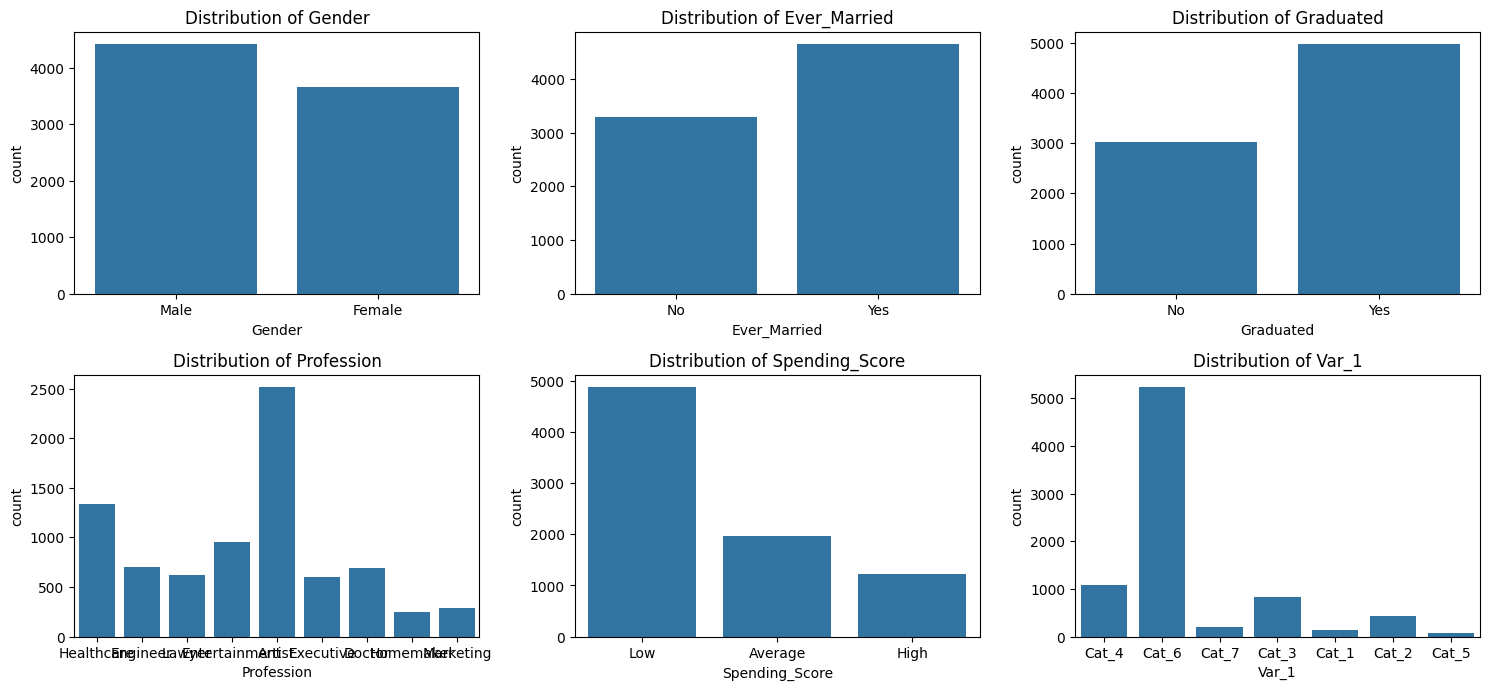

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=data, x=col)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


<ipython-input-12-a2f037789c57>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Segmentation'], palette="viridis")


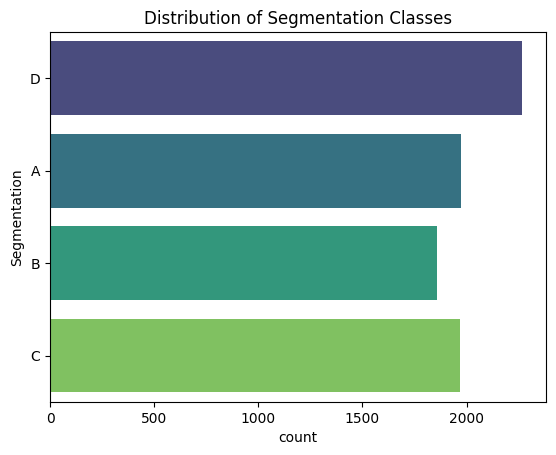

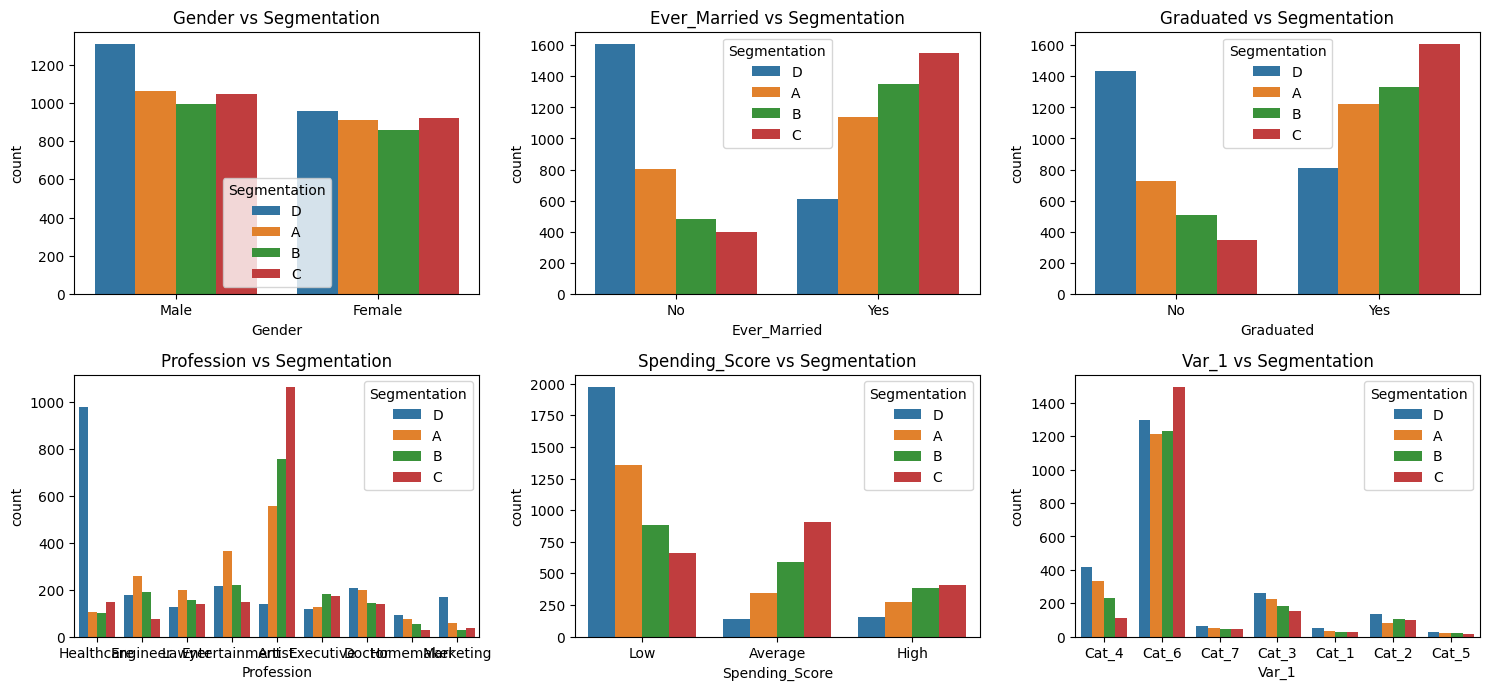

In [12]:
sns.countplot(data['Segmentation'], palette="viridis")
plt.title("Distribution of Segmentation Classes")
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, hue='Segmentation', data=data)
    plt.title(f'{col} vs Segmentation')
plt.tight_layout()
plt.show()


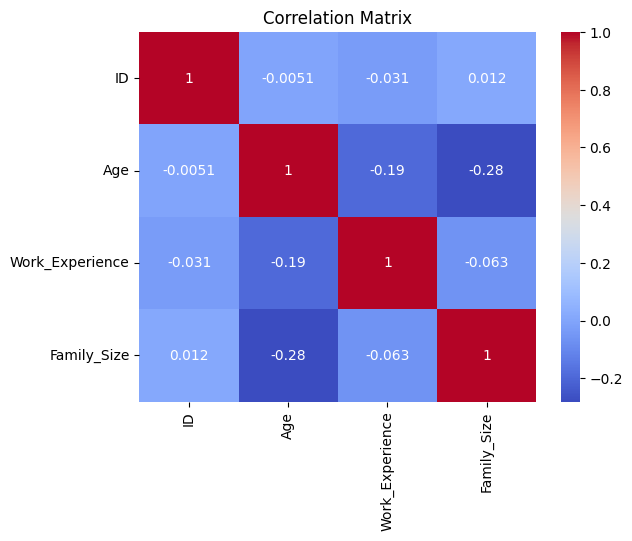

In [13]:
corr_matrix = data[['ID','Age','Work_Experience','Family_Size']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

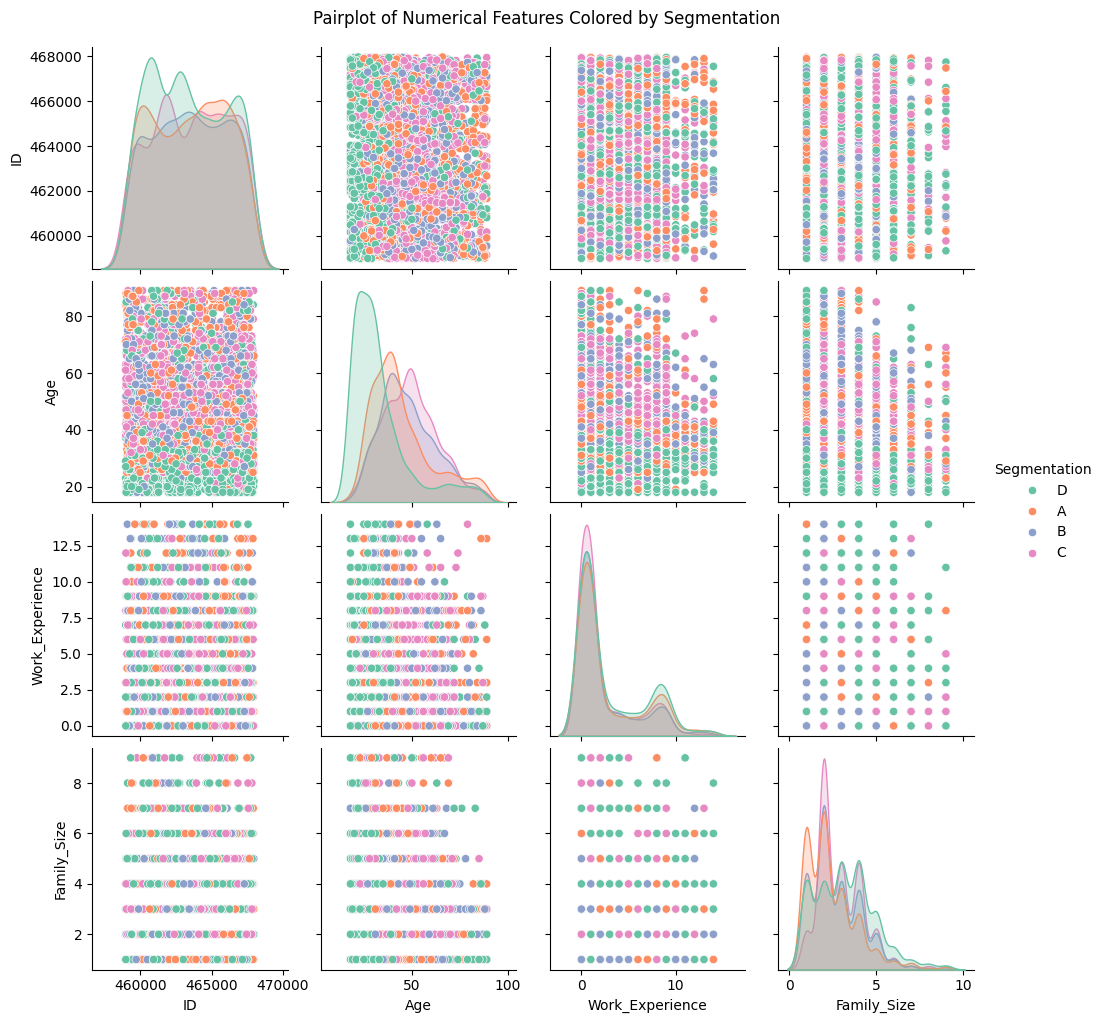

In [14]:
sns.pairplot(data[['ID','Age','Work_Experience','Family_Size'] + ['Segmentation']], hue='Segmentation', palette='Set2')
plt.suptitle("Pairplot of Numerical Features Colored by Segmentation", y=1.02)
plt.show()

In [15]:
data.dtypes
import numpy as np
X = data.iloc[ : , : -1].values
y = data.iloc[ : ,-1].values
print(X)
X = pd.DataFrame(X)
X.replace(" ",np.nan,inplace=True)
X = X.apply(pd.to_numeric,errors = 'coerce')

print(y)

[[462809 'Male' 'No' ... 'Low' 4.0 'Cat_4']
 [462643 'Female' 'Yes' ... 'Average' 3.0 'Cat_4']
 [466315 'Female' 'Yes' ... 'Low' 1.0 'Cat_6']
 ...
 [465406 'Female' 'No' ... 'Low' 1.0 'Cat_6']
 [467299 'Female' 'No' ... 'Low' 4.0 'Cat_6']
 [461879 'Male' 'Yes' ... 'Average' 3.0 'Cat_4']]
['D' 'A' 'B' ... 'D' 'B' 'B']


In [16]:
from sklearn.compose import ColumnTransformer

import numpy as np
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
categorical_features = ['Gender','Ever_Married','Graduated','Profession','Spending_Score','Var_1']
cf = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),categorical_features)],remainder='passthrough')
X = np.array(cf.fit_transform(data.drop('Segmentation',axis=1)))
X = pd.DataFrame(X)
X.replace(" ",np.nan,inplace=True)
X = X.apply(pd.to_numeric,errors = 'coerce')
X.fillna(X.mean(),inplace=True)
print(X)
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

       0    1    2    3    4    5    6    7    8    9   ...   23   24   25  \
0     0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0   
1     1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  1.0  0.0   
2     1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3     0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4     1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
8063  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
8064  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0   
8065  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
8066  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
8067  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  1.0  0.0   

       26   27   28        29    30        31   32  
0     0.0 

In [17]:
data.dtypes

,0
ID,int64
Gender,object
Ever_Married,object
Age,int64
Graduated,object
Profession,object
Work_Experience,float64
Spending_Score,object
Family_Size,float64
Var_1,object


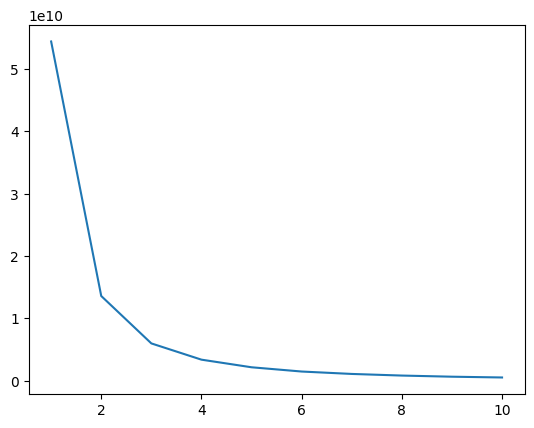

[2 2 0 ... 0 0 1]


In [18]:
import matplotlib.pyplot as plt
wcss = []
from sklearn.cluster import KMeans
for i in range(1,11):
  kmeans = KMeans(i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.show()
kmeans = KMeans(n_clusters=3)
y_means = kmeans.fit_predict(X)
print(y_means)

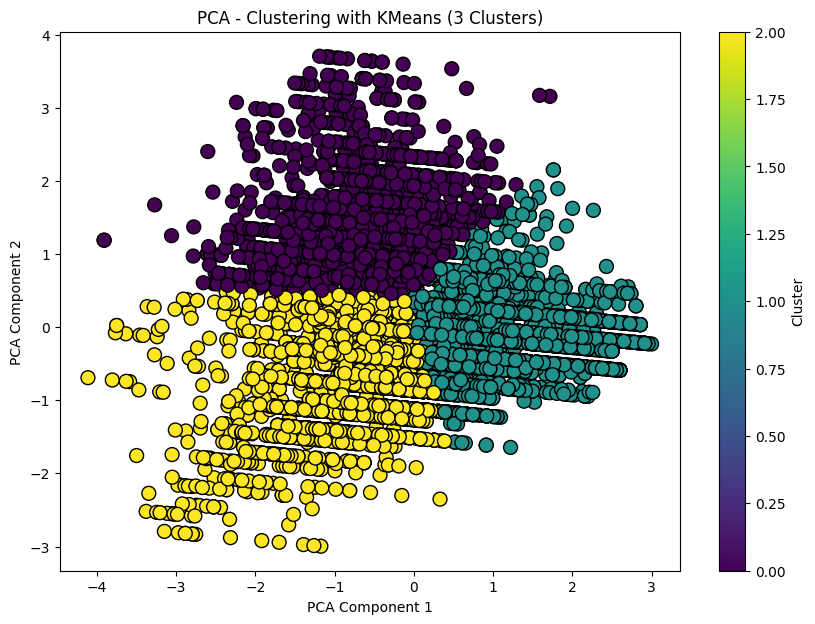

       ID  Age  Work_Experience  Family_Size  Cluster
0  462809   22              1.0          4.0        2
1  462643   38              NaN          3.0        2
2  466315   67              1.0          1.0        1
3  461735   67              0.0          2.0        1
4  462669   40              NaN          6.0        2


In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
#Impute the missing values
imputer = SimpleImputer(strategy='mean')
features = data[['Age', 'Work_Experience', 'Family_Size']]
imputed_features = imputer.fit_transform(features)
#Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(imputed_features)
#Applying PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
#KMeans Clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_features)
#Visualizing clusters
plt.figure(figsize=(10, 7))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA - Clustering with KMeans (3 Clusters)")
plt.colorbar(label="Cluster")
plt.show()
data['Cluster'] = clusters
print(data[['ID', 'Age', 'Work_Experience', 'Family_Size', 'Cluster']].head())#adding cluster names to the original dataframe